In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy
from logger import Trace
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:

def process_df(map_name, cols, map_col, data_cols, extra, df, window=10, save=False):
    
    col_index = 0
    
    num_iterations = df[cols[col_index]].nunique()
    num_episodes = df[cols[col_index+1]].nunique()
    iterations = df[cols[col_index]].unique()
    episodes = df[cols[col_index+1]].unique()
    
    print(f'episodes :{num_episodes} {episodes}, iterations:{num_iterations}')
    
    sum_df = pd.DataFrame(columns= extra)
    
    row = {}
    
    for i in iterations:
        row[cols[col_index]] = i 
        for e in episodes:
            row[cols[col_index+1]] = e
            for col in data_cols:
                row[col] = df.loc[(df[cols[col_index]] == i) & (df[cols[col_index+1]] == e), col].sum()
                
            sum_df = sum_df.append(row, ignore_index=True)
                                                                 
                                                                 
    print(sum_df)
    
    sum_df['mean_rew'] = sum_df[data_cols].mean(axis=1)
    sum_df['mean_std'] = sum_df[data_cols].std(axis=1)
    # .rolling(window=window).mean()
    
    print(sum_df)
    print(sum_df.describe())
    
    print('--- Smoothing...')
    
    smooth_df =sum_df.rolling(window=window).mean()
    print(smooth_df)
    print(smooth_df.describe())
    
    new_file = 'graph_data/'
    # sum_df.to_csv(new_file, encoding='utf-8')
    if save:
        print('---- Saving :' + map_name)
        smooth_df.to_csv(new_file+map_name+'.csv', encoding='utf-8')
    else:
        return sum_df

In [23]:
def smoothing(map_name, map_col, data_cols, extra, df, window=10, save=False):
    
    col_index = 0
    
    
    num_iterations = 1
    num_episodes = df.shape[0]
    
    print(f'episodes :{num_episodes}, iterations:{num_iterations}')                                                             
                                                                 
    
    df['mean_rew'] = df[data_cols].mean(axis=1)
    df['std'] = df[data_cols].std(axis=1)
    max_val = np.max(df[data_cols].max())
    min_val = np.min(df[data_cols].min())
    df['norm_mean'] = (df['mean_rew'] - min_val)/ (max_val - min_val)
    # .rolling(window=window).mean()
    
    print(df)
    print(df.describe())
    
    print('--- Smoothing...')
    
    smooth_df = df.copy()
    smooth_df['mean_smooth_rew'] =df['norm_mean'].rolling(window=window).mean()
    smooth_df['std_smooth_rew'] =df['norm_mean'].rolling(window=window).std()
    
    print(smooth_df)
    print(smooth_df.describe())
    
    new_file = 'graph_data/'
    # sum_df.to_csv(new_file, encoding='utf-8')
    if save:
        print('---- Saving :' + map_name)
        smooth_df.to_csv(new_file+map_name+'.csv', encoding='utf-8')
    else:
        return smooth_df

In [24]:
n_agents = 2
window=1000

### Load trace from file

In [25]:
map_name= 'benchmark1'
file= 'shared_oa_bench2_returns_df.csv'
array_file = 'shared_oa_bench2_returns.csv'

In [26]:
trace = Trace(n_agents, file)

In [27]:
# cols =  trace.columns
data_cols = [f'reward_{i}' for i in range(n_agents)]
map_col = 'map'
extra =[]# [f'std_dev_{i}' for i in range(n_agents)]
extra.append('mean_rew' )
extra.append('mean_std')


In [28]:
arr = np.loadtxt(array_file, delimiter=",")

In [29]:
df = pd.DataFrame(data = arr,
                  columns = data_cols)
df.head()

,reward_0,reward_1
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [30]:
sum_df=smoothing(map_name, map_col, data_cols, extra, df, window=window)

episodes :150000, iterations:1
        reward_0  reward_1  mean_rew  std  norm_mean
0           0.00      0.00      0.00  0.0   0.000000
1           0.00      0.00      0.00  0.0   0.000000
2           0.00      0.00      0.00  0.0   0.000000
3           0.00      0.00      0.00  0.0   0.000000
4           0.00      0.00      0.00  0.0   0.000000
...          ...       ...       ...  ...        ...
149995      1.85      1.85      1.85  0.0   0.984043
149996      1.79      1.79      1.79  0.0   0.952128
149997      1.82      1.82      1.82  0.0   0.968085
149998      1.51      1.51      1.51  0.0   0.803191
149999      1.87      1.87      1.87  0.0   0.994681

[150000 rows x 5 columns]
            reward_0       reward_1       mean_rew       std      norm_mean
count  150000.000000  150000.000000  150000.000000  150000.0  150000.000000
mean        0.972162       0.972162       0.972162       0.0       0.517108
std         0.800751       0.800751       0.800751       0.0       0.425932
mi

In [31]:
sum_df.shape


(150000, 7)

## Load baseline

In [32]:
array_file_base = 'shared_oa_bench2_returns_base.csv'
arrb = np.loadtxt(array_file_base, delimiter=",")

In [33]:
df_b = pd.DataFrame(data = arrb,
                  columns = data_cols)
df_b.head()

,reward_0,reward_1
0,0.0,4.0
1,10.0,14.0
2,0.0,0.0
3,0.0,0.0
4,0.0,14.0


In [34]:
np.max(df_b[data_cols].max())

14.0

In [35]:
sum_df_b=smoothing(map_name, map_col, data_cols, extra, df_b, window=1000)

episodes :150000, iterations:1
        reward_0  reward_1  mean_rew       std  norm_mean
0            0.0       4.0       2.0  2.828427   0.142857
1           10.0      14.0      12.0  2.828427   0.857143
2            0.0       0.0       0.0  0.000000   0.000000
3            0.0       0.0       0.0  0.000000   0.000000
4            0.0      14.0       7.0  9.899495   0.500000
...          ...       ...       ...       ...        ...
149995      10.0       4.0       7.0  4.242641   0.500000
149996      10.0      14.0      12.0  2.828427   0.857143
149997      10.0      14.0      12.0  2.828427   0.857143
149998      10.0      14.0      12.0  2.828427   0.857143
149999      10.0      14.0      12.0  2.828427   0.857143

[150000 rows x 5 columns]
            reward_0       reward_1       mean_rew            std  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        8.785720      10.181627       9.483673       3.626902   
std         3.338419       4.618970    

## Plotting

In [36]:
import tikzplotlib
import matplotlib
plt.style.use("seaborn-talk")
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True
})


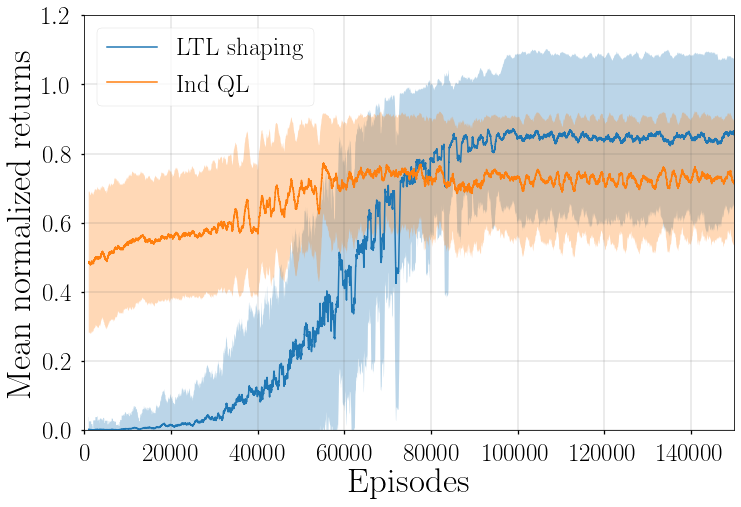

In [37]:
graphsize = 35
fig, axs = plt.subplots(1, 1)

sum_df.plot(kind='line', y='mean_smooth_rew', ax=axs, label='LTL shaping', linewidth=1.5, fontsize=graphsize-10)
axs.fill_between(np.arange(0,sum_df.shape[0]), sum_df['mean_smooth_rew']-sum_df['std_smooth_rew'], sum_df['mean_smooth_rew']+sum_df['std_smooth_rew'],
                       alpha= 0.3, linewidth=0)
sum_df_b.plot(kind='line', y='mean_smooth_rew', ax=axs, label='Ind QL', linewidth=1.5, fontsize=graphsize-10)
axs.fill_between(np.arange(0,sum_df_b.shape[0]), sum_df_b['mean_smooth_rew']-sum_df_b['std_smooth_rew'], sum_df_b['mean_smooth_rew']+sum_df_b['std_smooth_rew'],
                       alpha= 0.3, linewidth=0)

# axs[1, 1].plot(x, -y, 'tab:red')
# axs.set_title('Benchmark 1', fontsize=25)
axs.legend(loc='upper left', fontsize=graphsize-10)
axs.ticklabel_format(axis='both')

# axs.set(xlabel='Episodes', ylabel='')
axs.set_xlabel('Episodes', fontsize=graphsize)
axs.set_ylabel('Mean normalized returns', fontsize=graphsize)
axs.set_ylim([0, 1.2])
axs.set_xlim([0, sum_df.shape[0]])
axs.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.25)

plt.tight_layout()
plt.show()

In [73]:
tikzplotlib.clean_figure(fig=fig, target_resolution=300)


In [39]:
map_name='benchmark3'

In [75]:
tikzplotlib.save("graph_data/learning_curve_"+map_name+".tex", figure=fig)

In [40]:
fig.savefig("graph_data/"+map_name+".png", transparent=True, dpi=600)